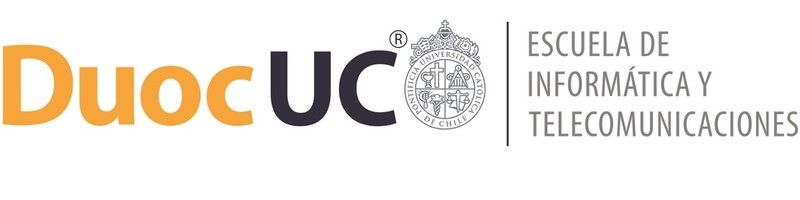

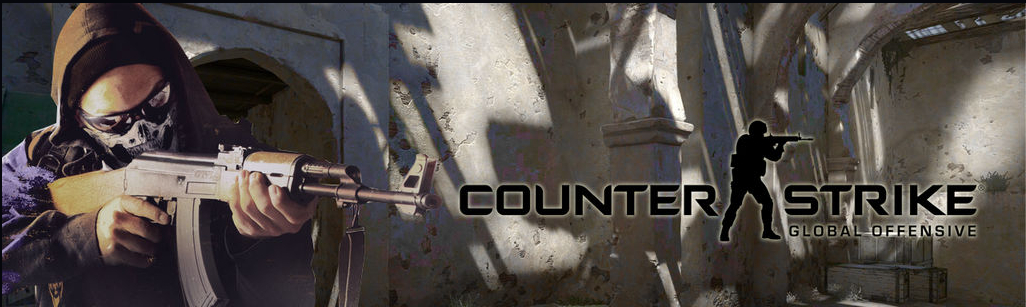

# Informe Técnico - Counter Strike


Integrantes:
*Luciano Tejeda
*

Docente:Giocrisrai Godoy Bonillo
     

Sección: MLY0100 -002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [1]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación


CSGO es un shooter multijugador 5 contra 5 en el cual se enfrentan 2 equipos terroristas y antiterroristas. Se busca comprender qué características del juego y de los jugadores están asociadas con la victoria.

Características del juego:

  Dato: Map, Descripción: Nombre del Mapa donde se jugó la partida

  Dato: RoundId, Descripción: Identificador de la ronda

  Dato: RoundStartingEquipmentValue, Descripción: Valor del equipamiento llevado por el jugador al inicio de la ronda.
  
  Dato: TeamStartingEquipmentValue, Descripción: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.

Características de los jugadores:

  Dato: PrimaryXXXX [Match|Round], Descripción: Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.
  
  Dato: [Match|Round] Assists, Descripción: Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.
  
  Dato: [Match|Round] Kills, Descripción: Cantidad de kills efectuados por el jugador durante la partida o la ronda.
  
  Dato: [Match|Round] FlankKills, Descripción: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.
  
  Dato: [Match|Round] HeadShots, Descripción: Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.
  
  Dato: RLethalGrenadesThrown/RNonLethalGrenadesThrown, Descripción: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
  
  Dato: TimeAlive, Descripción: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego
  
  Dato: TravelledDistance, Descripción: Distancia viajada por el jugador durante la partida.


Calificacion

¿Que pueden influir en el triunfo de una ronda?

Regresion

¿Cuantas granadas se usan en la ronda?

In [2]:
#Importar el drive para usar el dataset y carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from seaborn import violinplot
from sklearn.preprocessing import LabelEncoder


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ruta del archivo en Google Drive
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
counter = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-3-1161224160.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  counter = pd.read_csv(name, sep=";")


In [4]:
# Vista inicial
print("Forma del dataset:", counter.shape)
print("\nColumnas:")
print(counter.columns.tolist())

# Tipos de datos
print("\nTipos de datos:")
print(counter.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(counter.isnull().sum())

Forma del dataset: (79157, 30)

Columnas:
['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

Tipos de datos:
Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                     object
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                      

In [5]:
# Convertir columnas numéricas que fueron importadas como object
counter['TimeAlive'] = pd.to_numeric(counter['TimeAlive'], errors='coerce')
counter['TravelledDistance'] = pd.to_numeric(counter['TravelledDistance'], errors='coerce')

# Eliminar registros con datos críticos faltantes
counter = counter.dropna(subset=['Team', 'MatchWinner'])

# Verificación después de limpieza
print(counter.isnull().sum())

Unnamed: 0                         0
Map                                0
Team                               0
InternalTeamId                     0
MatchId                            0
RoundId                            0
RoundWinner                        0
MatchWinner                        0
Survived                           0
AbnormalMatch                      0
TimeAlive                      78374
TravelledDistance              78873
RLethalGrenadesThrown              0
RNonLethalGrenadesThrown           0
PrimaryAssaultRifle                0
PrimarySniperRifle                 0
PrimaryHeavy                       0
PrimarySMG                         0
PrimaryPistol                      0
FirstKillTime                      0
RoundKills                         0
RoundAssists                       0
RoundHeadshots                     0
RoundFlankKills                    0
RoundStartingEquipmentValue        0
TeamStartingEquipmentValue         0
MatchKills                         0
M


En esta sección se explorarán:

- Distribución de kills por ronda
- Mapas más jugados
- Equipamiento inicial de los equipos
- Relación entre equipamiento y resultado de ronda


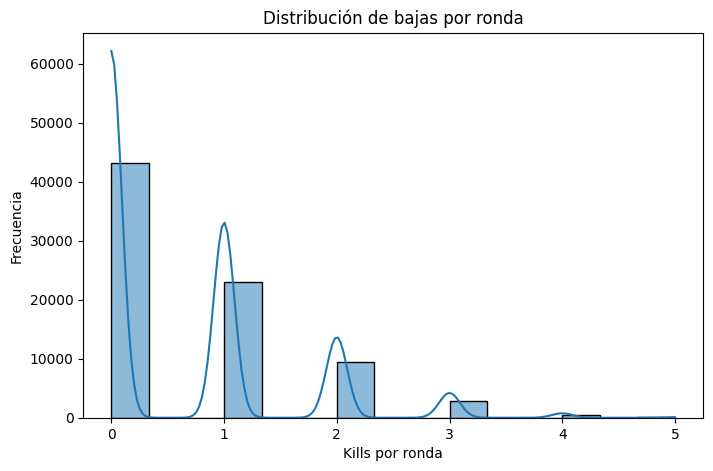

In [6]:
# Distribución de kills por ronda
plt.figure(figsize=(8,5))
sns.histplot(counter['RoundKills'], kde=True, bins=15)
plt.title('Distribución de bajas por ronda')
plt.xlabel('Kills por ronda')
plt.ylabel('Frecuencia')
plt.show()

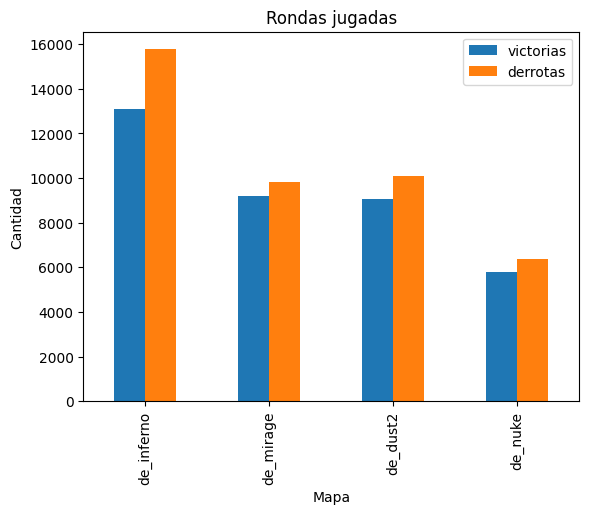

In [7]:
map_victories = counter[counter['MatchWinner'] == True]['Map'].value_counts()
map_losses = counter[counter['MatchWinner'] == False]['Map'].value_counts()

map_data = pd.concat([map_victories, map_losses], axis=1)
map_data.columns = ['victorias', 'derrotas']

map_data.plot(kind='bar')
plt.title('Rondas jugadas')
plt.xlabel('Mapa')
plt.ylabel('Cantidad')
plt.show()

## Fase 2: Data Understanding

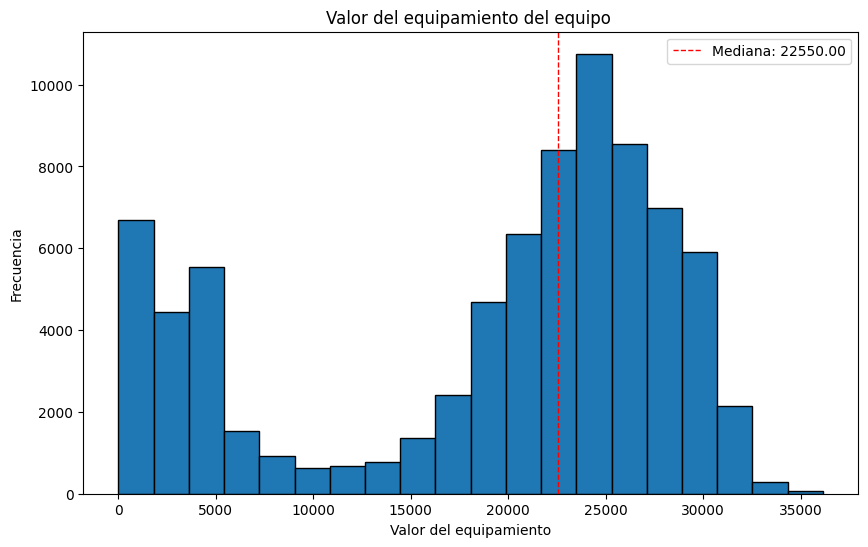

Coeficiente de asimetría: -0.5366472202007072


In [8]:
plt.figure(figsize=(10, 6))
plt.hist(counter['TeamStartingEquipmentValue'], bins=20, edgecolor='black')
plt.xlabel('Valor del equipamiento')
plt.ylabel('Frecuencia')

median = counter['TeamStartingEquipmentValue'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1, label=f'Mediana: {median:.2f}')
plt.legend()

plt.title('Valor del equipamiento del equipo ')
plt.show()

coef_asimetia = counter['RoundStartingEquipmentValue'].skew()
print("Coeficiente de asimetría:", coef_asimetia)

/tmp/ipython-input-9-1961996926.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='RoundWinner', y='RNonLethalGrenadesThrown', palette='viridis')


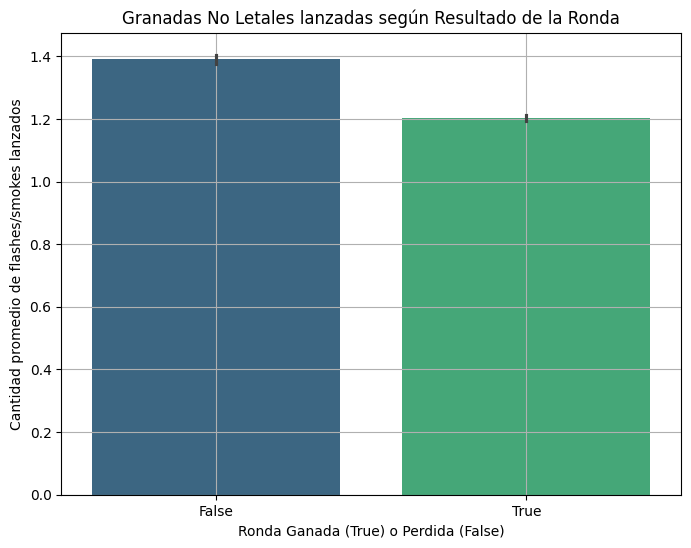


Conclusiones:
- Mayor cantidad de flashes y smokes suele correlacionar con más probabilidad de ganar la ronda.



In [9]:
# Seleccionar columnas relevantes
data = counter[['RNonLethalGrenadesThrown', 'RoundWinner', 'RoundKills']]

# Limpiar datos: eliminar filas nulas
data = data.dropna()

# Convertir RoundWinner a tipo booleano (por si viene como texto)
data['RoundWinner'] = data['RoundWinner'].astype(bool)

# Gráfico 1: Promedio de granadas no letales lanzadas en rondas ganadas vs perdidas
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='RoundWinner', y='RNonLethalGrenadesThrown', palette='viridis')
plt.title('Granadas No Letales lanzadas según Resultado de la Ronda')
plt.xlabel('Ronda Ganada (True) o Perdida (False)')
plt.ylabel('Cantidad promedio de flashes/smokes lanzados')
plt.grid(True)
plt.show()


# Conclusión (comentario)
print("""
Conclusiones:
- Mayor cantidad de flashes y smokes suele correlacionar con más probabilidad de ganar la ronda.
""")


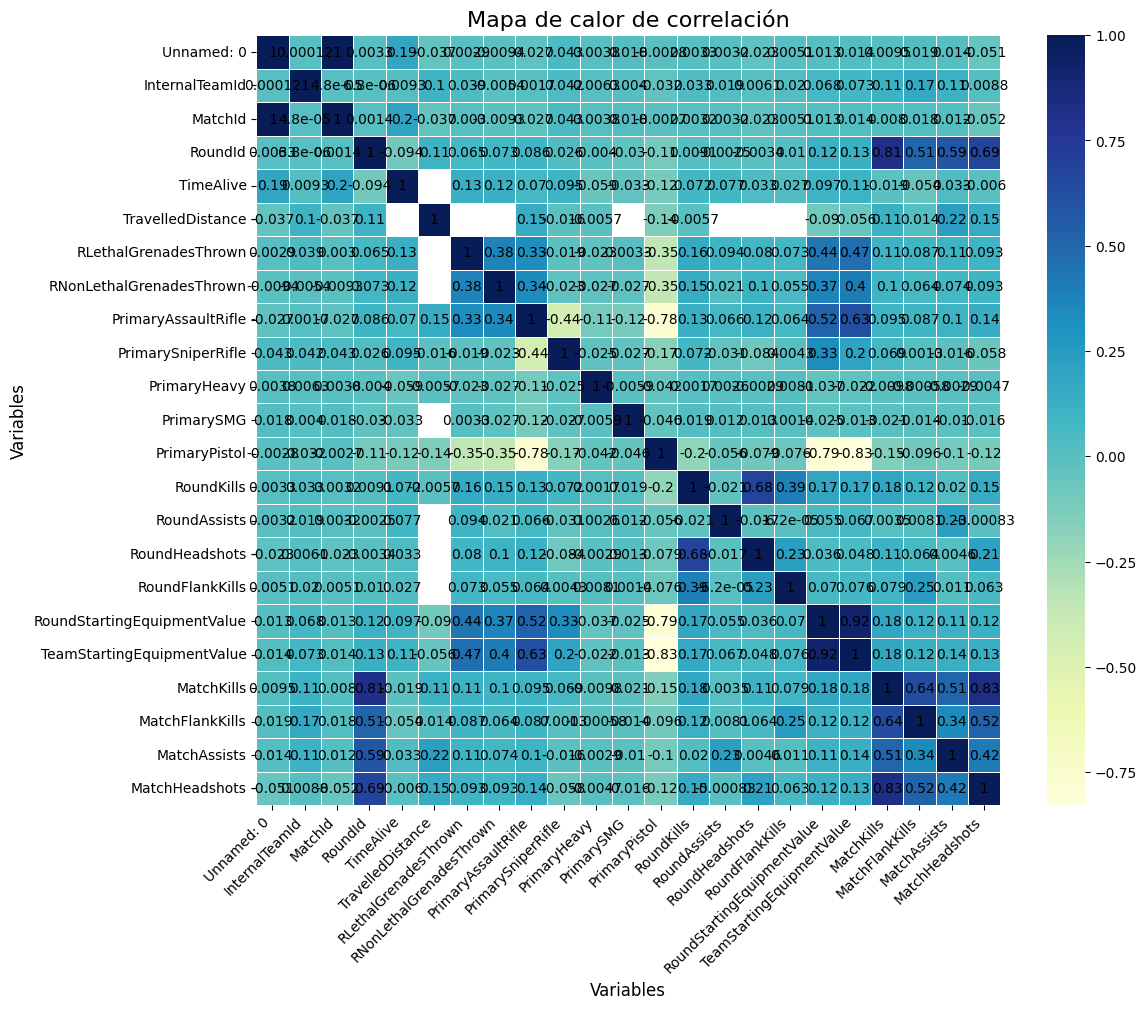

In [10]:
numeric_cols = counter.select_dtypes(include=np.number).columns

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 10))  # Ajusta las dimensiones según tus necesidades

# Crea el mapa de calor
sns.heatmap(counter[numeric_cols].corr(), annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"color": "black"})

# Ajusta el título y los nombres de los ejes
plt.title("Mapa de calor de correlación", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Ajusta la rotación de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Muestra el mapa de calor
plt.show()

. Variables altamente correlacionadas
RoundStartingEquipmentValue y TeamStartingEquipmentValue tienen una correlación de 0.92:

Si el valor de equipo al empezar la ronda es alto para un jugador, es muy probable que también sea alto para su equipo.

MatchKills y MatchHeadshots tienen una correlación de 0.83:

A más muertes realizadas en un partido, más disparos a la cabeza se logran.

MatchKills y RoundKills correlacionan en 0.64:

Un jugador que mata mucho en rondas individuales también tiene muchas muertes totales en el partido.

## Fase 3: Data Preparation

In [11]:
counter_backup = counter.copy()

In [12]:
counter_backup.drop(columns=['FirstKillTime'], inplace=True)
counter_backup.drop(columns=['TimeAlive'], inplace=True)
counter_backup.drop(columns=['TravelledDistance'], inplace=True)

### Eliminacion de datos atipicos

In [13]:
counter_backup.drop(counter_backup[counter_backup['MatchKills'] > 28].index, inplace=True)
counter_backup.shape

(78992, 27)

In [14]:
counter_backup.drop(counter_backup[counter_backup['MatchAssists'] > 8].index, inplace=True)
counter_backup.shape

(78707, 27)

In [15]:
label_encoder = LabelEncoder()
counter_backup['Team'] = label_encoder.fit_transform(counter_backup['Team'])
counter_backup['Map'] = label_encoder.fit_transform(counter_backup['Map'])

In [16]:
counter_backup['Map'].unique()

array([1, 3, 2, 0])

### Transformar datos booleanos

In [17]:
counter_backup.RoundWinner = counter_backup.RoundWinner.astype(bool)
counter_backup.MatchWinner = counter_backup.MatchWinner.astype(bool)
# Conversion
counter_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
counter_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
counter_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-17-2581591286.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  counter_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-17-2581591286.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  counter_backup.RoundWinner.replace({True: 1, False: 0}, inpl

In [18]:
# Revisiom
counter_backup.info()
# Vista previa
counter_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   78707 non-null  int64  
 1   Map                          78707 non-null  int64  
 2   Team                         78707 non-null  int64  
 3   InternalTeamId               78707 non-null  int64  
 4   MatchId                      78707 non-null  int64  
 5   RoundId                      78707 non-null  int64  
 6   RoundWinner                  78707 non-null  int64  
 7   MatchWinner                  78707 non-null  int64  
 8   Survived                     78707 non-null  int64  
 9   AbnormalMatch                78707 non-null  bool   
 10  RLethalGrenadesThrown        78707 non-null  int64  
 11  RNonLethalGrenadesThrown     78707 non-null  int64  
 12  PrimaryAssaultRifle          78707 non-null  float64
 13  PrimarySniperRifle   

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,1,1,1,4,1,1,1,0,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,1,1,1,4,1,1,1,0,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,1,1,1,4,1,1,1,0,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,1,1,1,4,1,1,1,0,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,1,1,1,4,1,1,1,1,False,...,0,0,0,0,1000,4400,0,0,0,0


In [19]:
# Limitar numero de rondas
counter_backup = counter_backup[(counter_backup['RoundId'] >= 1) & (counter_backup['RoundId'] <= 30)]

counter_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

#Fase 4: Modelamiento

# Modelos de Regresión

A continuación se listan los distintos modelos usados en este proyecto:

- [Regresión Lineal](https://github.com/CuatroPeso/MachineParcial/blob/main/Regresion%20Lineal.ipynb)
- [Regresion Lineal Multiple](https://github.com/CuatroPeso/MachineParcial/blob/main/RegresionLinealMultiple.ipynb)
- [Random Forest](https://github.com/CuatroPeso/MachineParcial/blob/main/RandomForest.ipynb)
- [Support Vector Machine](https://github.com/CuatroPeso/MachineParcial/blob/main/Support%20Vector%20Machine.ipynb)
- [Decision Tree](https://github.com/CuatroPeso/MachineParcial/blob/main/DecisionTree.ipynb)

# Modelos de Calificacion

A continuación se listan los distintos modelos usados en este proyecto:

- [KNN](https://github.com/CuatroPeso/MachineParcial/blob/main/KNN.ipynb)
- [SVM](https://github.com/CuatroPeso/MachineParcial/blob/main/CalSVM.ipynb)
- [RandomForest](https://github.com/CuatroPeso/MachineParcial/blob/main/CalRandomForest.ipynb)
- [DecisionTree](https://github.com/CuatroPeso/MachineParcial/blob/main/CalDecisionTree.ipynb)

### Conclusion

Tras comparar distintos modelos de regresión para analizar cómo influyen las granadas lanzadas en la cantidad de kills por ronda, se concluye que el modelo Random Forest Regressor ofrece el mejor rendimiento general. Con un R² de 0.4583, una MAE de 0.3057 y un RMSE de 0.4398, este modelo demuestra una mayor capacidad predictiva y menor margen de error en comparación con los demás enfoques evaluados. Esto sugiere que los patrones no lineales y las interacciones entre variables juegan un rol importante en esta relación, los cuales Random Forest logra capturar de forma más efectiva. En contraste, modelos como Support Vector Machine no resultaron adecuados para este caso, presentando un R² negativo y errores significativamente mayores. Por tanto, se recomienda el uso de Random Forest para futuros análisis relacionados con el impacto de acciones tácticas en el rendimiento por ronda.

Si nuestro objetivo principal es predecir correctamente qué equipo ganará la ronda, los modelos de SVM, Random Forest y Decision Tree alcanzan un accuracy del ~71%. De estos, Random Forest destaca por su balance entre rendimiento y robustez.
